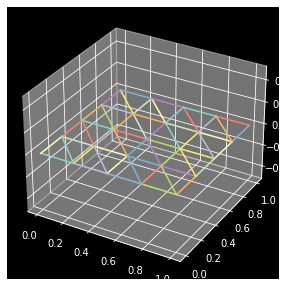

In [202]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(5,5))
ax = plt.subplot(projection = '3d')
def draw3d(x1,y1,x2,y2):
    ax.plot([x1,x2],[y1,y2],[0,0])
    
N = 5
x = np.linspace(0,1,N)
y = x
z = x

for i in range(0,N):
    for j in range(1,N):
        draw3d(x[j-1],y[i],x[j],y[i])
        draw3d(x[i],y[j-1],x[i],y[j])
        if i>= 1:
            draw3d(x[i-1],y[j],x[i],y[j-1])
plt.show()


In [203]:
ad = np.zeros((N,N))

def feasible(val,duoi, tren):
    return (val >= duoi and val <=tren)

In [204]:
feasible(1,0,4)

True

In [205]:
di = [1,0,-1,-1,0,1]
dj = [0,1,1,  0,-1,-1]
adj = ad.tolist()
for i in range(0,N):
    for j in range(0,N):
        adj[i][j] = []
        for k in range(0,6):
            ke_i = i + di[k]
            ke_j = j + dj[k]
            if(feasible(ke_i,0,N-1) and feasible(ke_j,0,N-1)):
                adj[i][j].append([ke_i,ke_j])

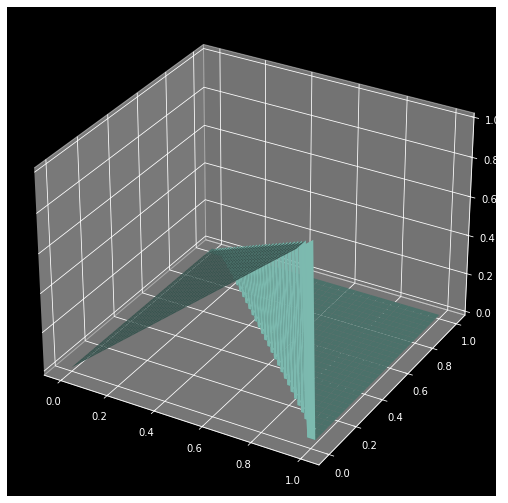

In [206]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
def det(x_val,y_val,x1,y1,x2,y2):
    return (x1-x_val)*(y2-y_val) - (x2-x_val)*(y1-y_val)
def check_in(x1,y1,x2,y2,x3,y3,val_x,val_y):
    d1 = det(val_x,val_y,x1,y1,x2,y2)
    d2 = det(val_x,val_y,x2,y2,x3,y3)
    d3 = det(val_x,val_y,x3,y3,x1,y1)
    thuan = (d1<=0 and d2<=0 and d3<=0)
    nguoc = (d1>=0 and d2>=0 and d3>=0)
    return thuan or nguoc
def pyramid(x1,y1,x2,y2,x3,y3,val_x,val_y):
    if(not check_in(x1,y1,x2,y2,x3,y3,val_x,val_y)):
        return 0
    A = np.array([[x1,y1,1],[x2,y2,1],[x3,y3,1] ])
    b = np.array([1,0,0])
    [a,b,c] = np.linalg.solve(A,b)
    return a*val_x+b*val_y+c
# Creating dataset
M=32
x = np.outer(np.linspace(0,1, M), np.ones(M))
y = x.copy().T # transpose
z = np.zeros((M,M))
for i in range(0,M):
    for j in range(0,M):
        z[i][j] = pyramid(1,0 ,0,0, 0,1,x[i][j],y[i][j])
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()

In [191]:
check_in(0,0,1,0,0,1,0.5,0.3)

True